In [28]:
import pandas as pd
import numpy as np
import random 
import statistics 
from decimal import Decimal
# Data libraries
import pandas as pd
import numpy as np
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt

In [29]:
def FastF_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    # Selection for clases
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
            
                Rates_1 = []
                for elements in Class_2:
                    Rates_1.append(servicerate_1[elements])
                
                fastest_rate = max(Rates_1) 
                result_1 = [key for key in Class_2 if servicerate_1[key] == fastest_rate] 

                if len(result_1)> 1:
                    s = random.choice(result_1)
                else:
                    s = result_1[0]
            
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                
                Rates_1 = []
                for elements in Class_1:
                    Rates_1.append(servicerate_1[elements])
                
                fastest_rate = max(Rates_1) 
                result_1 = [key for key in Class_1 if servicerate_1[key] == fastest_rate] 

                if len(result_1)> 1:
                    s = random.choice(result_1)
                else:
                    s = result_1[0]
                
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                Rates_2 = []
                for elements in Class_2:
                    Rates_2.append(servicerate_2[elements])
                
                fastest_rate = max(Rates_2) 
                result_2 = [key for key in Class_2 if servicerate_2[key] == fastest_rate] 

                if len(result_2)> 1:
                    s = random.choice(result_2)
                else:
                    s = result_2[0]
                
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                
                Rates_2 = []
                for elements in Class_3:
                    Rates_2.append(servicerate_2[elements])
                
                fastest_rate = max(Rates_2) 
                result_2 = [key for key in Class_3 if servicerate_2[key] == fastest_rate] 

                if len(result_2)> 1:
                    s = random.choice(result_2)
                else:
                    s = result_2[0]
                
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    if servicerate_1[s] > servicerate_2[s] and len(type_1)>0:
                        next_served = type_1[0]
                    elif servicerate_2[s] > servicerate_1[s] and len(type_2)>0:
                        next_served = type_2[0]
                    else:
                        next_served = Queue_name[0]
                        
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
        
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination

In [30]:
def FastR_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                s =  random.choice(Class_1)
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_3)
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
            
                    if servicerate_1[s] > servicerate_2[s] and len(type_1)>0:
                        next_served = type_1[0]
                
                    elif servicerate_2[s] > servicerate_1[s] and len(type_2)>0:
                        next_served = type_2[0]
                    else:
                        next_served = Queue_name[0]
                    
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
        
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination

In [31]:
def FastI_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)
            
    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
                
    idle_1 =  { s : 0 for s in free_servers}
    idle_2 =  { s : 0 for s in free_servers}
    Server_idle_1 = { s : 1 for s in free_servers} 
    Server_idle_2 = { s : 1 for s in free_servers} 
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        for elements in idle_1:
            idle_1[elements] += (TNOW - TLast)*Server_idle_1[elements]
            
        for elements in idle_2:
            idle_2[elements] += (TNOW - TLast)*Server_idle_2[elements]
        
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                
                Results_1 = []
                for elements in Class_2:
                    Results_1.append(idle_1[elements])
                longest_idle = max(Results_1) 
                serv_idle = [key for key in Class_2 if idle_1[key] == longest_idle] 
                
                if len(serv_idle) > 1:
                    s = random.choice(serv_idle)
                else:
                    s = serv_idle[0]
                
                Server_idle_1[s] = 0
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                
                Results_1 = []
                for elements in Class_1:
                    Results_1.append(idle_1[elements])
                longest_idle = max(Results_1) 
                serv_idle = [key for key in Class_1 if idle_1[key] == longest_idle] 
                
                if len(serv_idle) > 1:
                    s = random.choice(serv_idle)
                else:
                    s = serv_idle[0]
                
                Server_idle_1[s] = 0   
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                
                Results_2 = []
                for elements in Class_2:
                    Results_2.append(idle_2[elements])
                
                longest_idle = max(Results_2) 
                serv_idle = [key for key in Class_2 if idle_2[key] == longest_idle] 
                
                if len(serv_idle) > 1:
                    s = random.choice(serv_idle)
                else:
                    s = serv_idle[0]
                 
                Server_idle_2[s] = 0 
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                
                Results_2 = []
                for elements in Class_3:
                    Results_2.append(idle_2[elements])
                longest_idle = max(Results_2) 
                serv_idle = [key for key in Class_3 if idle_2[key] == longest_idle] 
                
                if len(serv_idle) > 1:
                    s = random.choice(serv_idle)
                else:
                    s = serv_idle[0]
                
                Server_idle_2[s] = 0
                free_servers.remove(s) 
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            Server_idle_1[Next_Event] = 1
            Server_idle_2[Next_Event] = 1
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Server_idle_1[s] = 0
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Server_idle_2[s] = 0
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    
                    if servicerate_1[s] > servicerate_2[s] and len(type_1)>0:
                        next_served = type_1[0]
                
                    elif servicerate_2[s] > servicerate_1[s] and len(type_2)>0:
                        next_served = type_2[0]
                    else:
                        next_served = Queue_name[0]
                        
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        Server_idle_1[s] = 0
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        Server_idle_2[s] = 0
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
        
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination

In [32]:
def FCFSI_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    # Selection for clases
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
                
    idle_1 =  { s : 0 for s in free_servers}
    idle_2 =  { s : 0 for s in free_servers}
    Server_idle_1 = { s : 1 for s in free_servers} 
    Server_idle_2 = { s : 1 for s in free_servers} 
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        for elements in idle_1:
            idle_1[elements] += (TNOW - TLast)*Server_idle_1[elements]
            
        for elements in idle_2:
            idle_2[elements] += (TNOW - TLast)*Server_idle_2[elements]
        
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                
                Results_1 = []
                for elements in Class_2:
                    Results_1.append(idle_1[elements])
                longest_idle = max(Results_1) 
                serv_idle = [key for key in Class_2 if idle_1[key] == longest_idle] 
                
                if len(serv_idle) > 1:
                    s = random.choice(serv_idle)
                else:
                    s = serv_idle[0]
                
                Server_idle_1[s] = 0
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                
                Results_1 = []
                for elements in Class_1:
                    Results_1.append(idle_1[elements])
                longest_idle = max(Results_1) 
                serv_idle = [key for key in Class_1 if idle_1[key] == longest_idle] 
                
                if len(serv_idle) > 1:
                    s = random.choice(serv_idle)
                else:
                    s = serv_idle[0]
                
                Server_idle_1[s] = 0   
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                
                Results_2 = []
                for elements in Class_2:
                    Results_2.append(idle_2[elements])
                
                longest_idle = max(Results_2) 
                serv_idle = [key for key in Class_2 if idle_2[key] == longest_idle] 
                
                if len(serv_idle) > 1:
                    s = random.choice(serv_idle)
                else:
                    s = serv_idle[0]
                 
                Server_idle_2[s] = 0 
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                
                Results_2 = []
                for elements in Class_3:
                    Results_2.append(idle_2[elements])
                longest_idle = max(Results_2) 
                serv_idle = [key for key in Class_3 if idle_2[key] == longest_idle] 
                
                if len(serv_idle) > 1:
                    s = random.choice(serv_idle)
                else:
                    s = serv_idle[0]
                
                Server_idle_2[s] = 0
                free_servers.remove(s) 
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            Server_idle_1[Next_Event] = 1
            Server_idle_2[Next_Event] = 1
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Server_idle_1[s] = 0
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Server_idle_2[s] = 0
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    next_served = Queue_name[0]
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        Server_idle_1[s] = 0
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        Server_idle_2[s] = 0
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
        
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination

In [33]:
def FCFSF_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    # Selection for clases
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)
            
    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
            
                Rates_1 = []
                for elements in Class_2:
                    Rates_1.append(servicerate_1[elements])
                
                fastest_rate = max(Rates_1) 
                result_1 = [key for key in Class_2 if servicerate_1[key] == fastest_rate] 

                if len(result_1)> 1:
                    s = random.choice(result_1)
                else:
                    s = result_1[0]
            
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                
                Rates_1 = []
                for elements in Class_1:
                    Rates_1.append(servicerate_1[elements])
                
                fastest_rate = max(Rates_1) 
                result_1 = [key for key in Class_1 if servicerate_1[key] == fastest_rate] 

                if len(result_1)> 1:
                    s = random.choice(result_1)
                else:
                    s = result_1[0]
                
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                Rates_2 = []
                for elements in Class_2:
                    Rates_2.append(servicerate_2[elements])
                
                fastest_rate = max(Rates_2) 
                result_2 = [key for key in Class_2 if servicerate_2[key] == fastest_rate] 

                if len(result_2)> 1:
                    s = random.choice(result_2)
                else:
                    s = result_2[0]
                
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                
                Rates_2 = []
                for elements in Class_3:
                    Rates_2.append(servicerate_2[elements])
                
                fastest_rate = max(Rates_2) 
                result_2 = [key for key in Class_3 if servicerate_2[key] == fastest_rate] 

                if len(result_2)> 1:
                    s = random.choice(result_2)
                else:
                    s = result_2[0]
                
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    next_served = Queue_name[0]
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
        
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination

In [34]:
def FCFSR_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a , b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    
    # Selection for clases
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                s =  random.choice(Class_1)
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_3)
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    next_served = Queue_name[0]
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(set(C_1 + C_2))
    split_2 = len(set(C_2 + C_3))
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate=0
    for i in servicerate_1:
        Avg_serv_rate += servicerate_1[i]+servicerate_2[i]
    Avg_serv_rate = Avg_serv_rate/2*len(servicerate_1)
    
    
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
        
    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination

In [128]:
def Edit_Entry(x, termination):
    new_entry = {}
    new_entry.update( Served = x[4])
    new_entry.update( Served_1 = x[16])
    new_entry.update( Served_2 = x[17])
    new_entry.update( Abandoned = x[0])
    new_entry.update( Waited = x[1])
    new_entry.update( Waiting_Time_S = x[3])
    new_entry.update( Waiting_Time_A = x[2])
    new_entry.update( Utilization = x[5])
    new_entry.update( Avg_Queue = x[6])
    new_entry.update( Queue_Fraction = x[8])
    new_entry.update( Avg_People = x[7])
    new_entry.update( Porportion_Waiting = x[1] /x[9])
    new_entry.update( Avg_servicerate = x[11])
    new_entry.update( Porportion_Abandonned = x[0] /x[9])
    new_entry.update( Abandonned_1 = x[14])
    new_entry.update( Abandonned_2 = x[15])
    new_entry.update( Pooling_1 = x[28]-x[30])
    new_entry.update( Pooling_2 = x[30])
    new_entry.update( Pooling_3 = x[29]-x[30])
    new_entry.update( Expected_ABR = x[0]/termination)
    new_entry.update( Observed_ABR = 0.5*x[6])
    new_entry.update( Expected_AR = x[9]/termination)
    new_entry.update( Observed_AR = (0.5*x[6])+x[31])
    new_entry.update( Expected_SR = x[4]/termination)
    new_entry.update( Observed_SR = x[31])
    return new_entry

In [130]:
matrix = pd.DataFrame()
matrix_F = pd.DataFrame()
matrix_i= pd.DataFrame()
matrix_fr = pd.DataFrame()
matrix_fI = pd.DataFrame()
matrix_ff =  pd.DataFrame()
free_servers = []
for i in range(0, 100):
    free_servers += ["Server_"+str(i)] 

for i in range(0,20):
    
    servicerate_1 = {}
    for server in free_servers:
        servicerate_1.update({ server : random.uniform(0,2)}) 
    servicerate_2 = {}
    for server in free_servers:
        servicerate_2.update({ server : random.uniform(0,2)})
        
    x = FCFSR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(x, 40000)
    new_entry.update( AreaQ_2 = x[-1])
    new_entry.update( AreaQ_1 = x[-2])
    matrix = matrix.append(new_entry, ignore_index = True)
    
    y = FCFSF_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(y,40000)
    new_entry.update( AreaQ_2 = y[-1])
    new_entry.update( AreaQ_1 = y[-2])
    matrix_F = matrix_F.append(new_entry, ignore_index = True)
    
    z = FCFSI_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(z,40000)
    new_entry.update( AreaQ_2 = z[-1])
    new_entry.update( AreaQ_1 = z[-2])
    matrix_i = matrix_i.append(new_entry, ignore_index = True)
    
    w = FastR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(w, 40000)
    new_entry.update( AreaQ_2 = w[-1])
    new_entry.update( AreaQ_1 = w[-2])
    matrix_fr = matrix_fr.append(new_entry, ignore_index = True)
    
    d = FastI_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(d, 40000)
    new_entry.update( AreaQ_2 = d[-1])
    new_entry.update( AreaQ_1 = d[-2])
    matrix_fI = matrix_fI.append(new_entry, ignore_index = True)
    
    e = FastF_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(e, 40000)
    new_entry.update( AreaQ_2 = e[-1])
    new_entry.update( AreaQ_1 = e[-2])
    matrix_ff = matrix_ff.append(new_entry, ignore_index = True)
     

In [88]:
matrix_ff["Expected_ABR"] = matrix_ff["Expected_ABR"]/4


matrix_ff["Expected_SR"] = matrix_ff["Expected_SR"]/4

matrix_ff["Expected_AR"] = matrix_ff["Expected_AR"]/4

matrix_ff[['Observed_ABR', 'Expected_ABR', 'Observed_AR','Expected_AR','Expected_SR','Observed_SR']]

,Observed_ABR,Expected_ABR,Observed_AR,Expected_AR,Expected_SR,Observed_SR
0,0.022804,0.023713,100.018978,100.004325,99.980613,99.996174
1,0.009224,0.008875,100.063104,100.024388,100.015512,100.053880
2,0.001927,0.001962,100.059869,100.015088,100.013125,100.057942
3,0.284505,0.284625,99.964521,99.994200,99.709575,99.680016
4,0.000894,0.000750,100.033741,99.967088,99.966337,100.032847
5,0.001889,0.001875,99.939334,99.987675,99.985800,99.937445
6,0.000412,0.000513,99.994006,100.002038,100.001525,99.993594
7,0.019553,0.019463,99.978118,99.990700,99.971238,99.958565
8,0.001692,0.001650,100.008949,100.050663,100.049013,100.007257
9,0.003101,0.002850,99.945301,100.022387,100.019537,99.942200


In [514]:
compare = [matrix, matrix_F, matrix_i,matrix_fr ,matrix_fI, matrix_ff]
T = ["Random - FCFS" ,"Fastest- FCFS ", "Longest Idle - FCFS", "Random - Skill","Longest Idle - Skill","Fastest - Skill "]


matrix_all = pd.DataFrame()
b=0 
for i in compare:
    i["Type"] = T[b]
    matrix_all = matrix_all.append(i, ignore_index = True)
    b+=1
    



In [490]:
20544.0/732.0

28.065573770491802

In [487]:
matrix.columns

Index(['Abandoned', 'Abandonned_1', 'Abandonned_2', 'AreaQ_1', 'AreaQ_2',
       'Avg_People', 'Avg_Queue', 'Avg_servicerate', 'Expected_ABR',
       'Expected_AR', 'Expected_SR', 'Observed_ABR', 'Observed_AR',
       'Observed_SR', 'Pooling_1', 'Pooling_2', 'Pooling_3',
       'Porportion_Abandonned', 'Porportion_Waiting', 'Queue_Fraction',
       'Served', 'Served_1', 'Served_2', 'Utilization', 'Waited',
       'Waiting_Time_A', 'Waiting_Time_S', 'Type'],
      dtype='object')

In this system, the observed differences in the abandonments per call type are highly variable according to the pooling factors, i.e. how many servers belong to pool 1 vs. pool 3 as well as the observed service rates. Notice for instance, in the cases when pool 3 is almost 50% larger, the impact on abandonment is further ceiled based on independent observed rates. Highlighting the difficulties 

In [159]:
import scipy

In [459]:
compare = [matrix, matrix_F, matrix_i,matrix_fr ,matrix_fI, matrix_ff]
col_name = ["Measure", "ServerAllocation", "Mean", "Variance", "CallerAllocation"]
Level = ["FCFS", "FCFS", "FCFS","Skill", "Skill", "Skill"]
T = ["Random" ,"Fastest ", "Longest Idle", "Random","Longest Idle","Fastest "]
matrix_routing = pd.DataFrame (columns = col_name)

new_entry = { c : 0 for c in col_name}
b = 0
for c in compare:
    for key in ['Abandoned','Avg_People', 'Avg_Queue', 'Served', 'Waiting_Time_S']:
        new_entry.update(ServerAllocation = Level[b])
        new_entry.update( CallerAllocation = T[b])
        new_entry.update( Measure = key)
        new_entry.update( Mean =  round(c[key].mean(), 5))
        new_entry.update( Variance =  statistics.variance((c)[key]))
        intervl = scipy.stats.t.ppf(q=.95,df=19)*np.sqrt(statistics.variance(c[key]))/np.sqrt(20)
        new_entry.update( ConfidenceInterval = "("+str(round(c[key].mean() - intervl, 5))+ ","+ str(round(c[key].mean() + intervl, 5))+")")
        new_entry.update( )
        matrix_routing = matrix_routing.append(new_entry, ignore_index = True)
    b+=1

In [460]:
matrix_routing.sort_values(["Measure", "Mean"])

,Measure,ServerAllocation,Mean,Variance,CallerAllocation,ConfidenceInterval
25,Abandoned,Skill,1.393950e+03,1.035159e+07,Fastest,"(149.96027,2637.93973)"
5,Abandoned,FCFS,1.394750e+03,1.007378e+07,Fastest,"(167.56631,2621.93369)"
10,Abandoned,FCFS,1.977700e+03,1.512040e+07,Longest Idle,"(474.22937,3481.17063)"
20,Abandoned,Skill,2.055950e+03,1.711428e+07,Longest Idle,"(456.41886,3655.48114)"
15,Abandoned,Skill,2.782650e+03,2.174686e+07,Random,"(979.584,4585.716)"
0,Abandoned,FCFS,2.793200e+03,2.191843e+07,Random,"(983.03518,4603.36482)"
26,Avg_People,Skill,6.876009e+01,1.045872e+01,Fastest,"(67.50968,70.0105)"
6,Avg_People,FCFS,6.878402e+01,1.027067e+01,Fastest,"(67.5449,70.02313)"
21,Avg_People,Skill,7.378422e+01,9.672835e+00,Longest Idle,"(72.58171,74.98674)"
11,Avg_People,FCFS,7.379629e+01,9.422918e+00,Longest Idle,"(72.60941,74.98316)"


Infact the FCFS policy seems to be performing slightly better attributing this to the slight deviations among simulations 

In [67]:
def comparing_iteratively(measure, list_matrix, x, labels):
    fig = plt.figure()
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111)
    
    for i in range(0, len(list_matrix)):
        ax.plot(x, list_matrix[i][measure],  label=labels[i])
    
    plt.xlabel("Average Service Rates", fontsize =  20)
    plt.ylabel( measure, fontsize =  20)
    plt.title( label = "Arrival Rates = 50, N= 100, Service Rate 1 ~ U(0, 2), Itercepts = (1,0.5) and (1, -0.5) and termination = 20000", fontsize =  15)
    ax.legend(fontsize = 15)
    plt.axis()
    plt.show 

Of all the systems, routing strategy has the lowest overall impact on the system performance. In essence this follows from the fact that the optimally assignment polcy is used and the default routind (Random and FCFS ) already observed favourable behavior. With the optimal pooling we observed much lower average utilization, resulting from effective planning. However, there is an added improvement with the routing strategy. 

In this set-up the server selection seems to have a larger impact on routing strategy. Again with the fastest server policy leading. This follows from the fact that the Skill based call selection only has an impact in the shared pool and in general service rates for both call types are similar thus not causing much variation. 

The observed changes in waitingg time are not observably obvious and as such we move on (almost identical). The behaviors previosuly witness are prevailent here whereby the random selection strategy lags back. The most obvivous improvement is the number of people who waited in the system. As such even if overall we don't see much in the sense of overall results, the fastest and skill selection cuts the overall number of people waiting on average among the 20 iteration by almost half. the observed variation occurs due to the selectuon on service rate, and resulting from an overall unfavourable selection of skills. 

Routing mechanisms does not greatly impact the system performance when the applies splitting method is optimal
 
 

The call selection seems to have the least impact, this follows from the fact that the majority of the servers lie in the specialized pools and since these have been set up such that preferable servers are serving their respective skills, the biggest influence this has is when callers end up being served by ... leading to a lower overall utilization of servers 

It is worthwhile to note that previously, the random selection in this situation has most variability since the performance heavikliy depends on system state. The best to highlight methods less variable depending on system states. 

More variability in the random FCFS that depends on system state such as server rate and status of queue.. this is affecting the number of people waiting 

The larger waiting time resulting from higher utilization here lies in utilizing a larger part of the slower workers and such increasing avergae waiting time. Unlike in the single server case, there is no clear winner at each ireration there. Waiting time is considstently better with longets idle 

The average number of people and average number of people in queue in the system identically (near) and wairinf time -s with the same server selection, impact of FCFS and skill is negligible. The actual number of people


<Figure size 432x288 with 0 Axes>

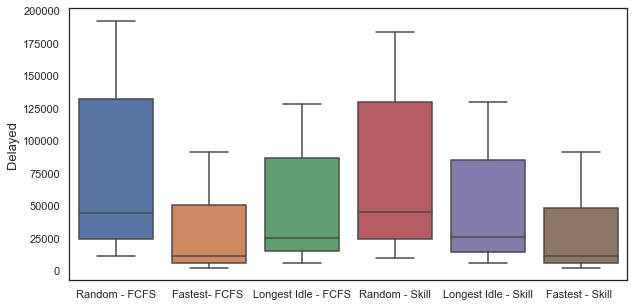

In [318]:
fig = plt.figure()
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Type", y="Waited", data=matrix_all,  showfliers = False)

ax.set_ylabel(ylabel='Delayed',  fontsize=13)

ax.set_xlabel(xlabel='',  fontsize=20)

ax.grid(False)
plt.show()

In [510]:
compare = [matrix_fr ,matrix_fI, matrix_ff]
T = ["Random - Skill","Longest Idle - Skill","Fastest - Skill "]

matrix_all_1 = pd.DataFrame()
b = 0

for i in compare:
    i["Routing"] = T[b]
    matrix_all_1 = matrix_all_1.append(i,ignore_index = True )
    b+=1

<Figure size 432x288 with 0 Axes>

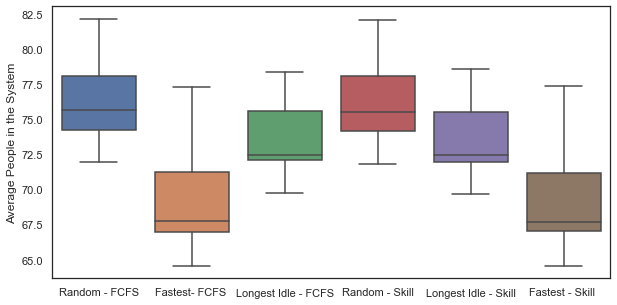

In [515]:
fig = plt.figure()
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Type", y="Avg_People", data=matrix_all,  showfliers = False)

ax.set_ylabel(ylabel='Average People in the System',  fontsize=12)

ax.set_xlabel(xlabel='',  fontsize=20)

ax.grid(False)
plt.show()

Text(43.805475, 0.5, 'Pool 1 Size ')

<Figure size 432x216 with 0 Axes>

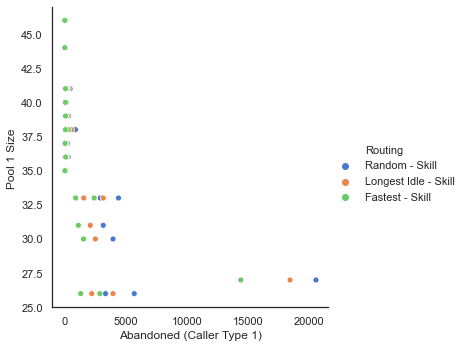

In [519]:
import seaborn as sns
sns.set(style="white")

plt.figure(figsize=(6,3))
# Plot miles per gallon against horsepower with other semantics
ax = sns.relplot(x="Abandonned_1", y="Pooling_1", hue="Routing", alpha=1, palette="muted",height=5, data=matrix_all_1)


    
plt.xlabel("Abandoned (Caller Type 1)", fontsize =  12)
    
plt.ylabel("Pool 1 Size ", fontsize =  12)

In [389]:
def comparing_iteratively(measure, l,  N, labels):
    ### Add for chaning other params 
    x = [i for i in range(0,N)]
    fig = plt.figure()
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    
    for i in range(len(l)):
        ax.plot(x, l[i][measure],label=labels[i])
    
    plt.xlabel("Iteration", fontsize =  12)
    plt.ylabel("ASA", fontsize =  12)
    ax.legend(fontsize = 12)
    
    plt.show 

In [322]:
compare = [matrix, matrix_F, matrix_i,matrix_fr ,matrix_fI, matrix_ff]
T = ["Random - FCFS" ,"Fastest- FCFS ", "Longest Idle - FCFS", "Random - Skill","Longest Idle - Skill","Fastest - Skill "]

<Figure size 432x288 with 0 Axes>

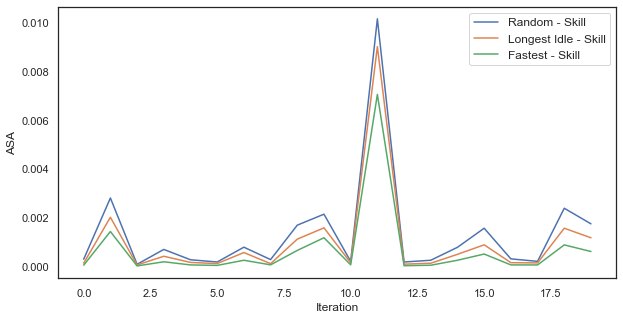

In [521]:
compare = [matrix_fr ,matrix_fI, matrix_ff]
T = ["Random - Skill","Longest Idle - Skill","Fastest - Skill "]


comparing_iteratively("Waiting_Time_S", compare,  20, T )

<Figure size 432x288 with 0 Axes>

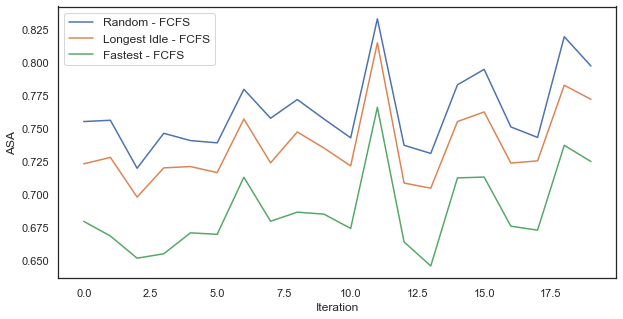

In [484]:
compare = [matrix,  matrix_i, matrix_F]
T = ["Random - FCFS","Longest Idle - FCFS","Fastest - FCFS "]


comparing_iteratively("Utilization", compare,  20, T )

MORE ANALYSIS

What happens When variance is lower than U(0,2)

In [131]:
matrix_low = pd.DataFrame()
matrix_F_low  = pd.DataFrame()
matrix_i_low = pd.DataFrame()
matrix_fr_low  = pd.DataFrame()
matrix_fI_low  = pd.DataFrame()
matrix_ff_low  =  pd.DataFrame()
free_servers = []

for i in range(0, 100):
    free_servers += ["Server_"+str(i)] 

for i in range(0,20):
    
    servicerate_1 = {}
    for server in free_servers:
        servicerate_1.update({ server : random.uniform(0,2)}) 
    servicerate_2 = {}
    for server in free_servers:
        servicerate_2.update({ server : random.uniform(0.6,1.4)})
        
    x = FCFSR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(x, 40000)
    new_entry.update( AreaQ_2 = x[-1])
    new_entry.update( AreaQ_1 = x[-2])
    matrix_low = matrix_low.append(new_entry, ignore_index = True)
    
    y = FCFSF_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(y, 40000)
    new_entry.update( AreaQ_2 = y[-1])
    new_entry.update( AreaQ_1 = y[-2])
    matrix_F_low = matrix_F_low.append(new_entry, ignore_index = True)
    
    z = FCFSI_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(z, 40000)
    new_entry.update( AreaQ_2 = z[-1])
    new_entry.update( AreaQ_1 = z[-2])
    matrix_i_low = matrix_i_low.append(new_entry, ignore_index = True)
    
    w = FastR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(w, 40000)
    new_entry.update( AreaQ_2 = w[-1])
    new_entry.update( AreaQ_1 = w[-2])
    matrix_fr_low = matrix_fr_low.append(new_entry, ignore_index = True)
    
    d = FastI_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(d, 40000)
    new_entry.update( AreaQ_2 = d[-1])
    new_entry.update( AreaQ_1 = d[-2])
    matrix_fI_low = matrix_fI_low.append(new_entry, ignore_index = True)
    
    e = FastF_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.25, 1, -0.25)
    new_entry = Edit_Entry(e, 40000)
    new_entry.update( AreaQ_2 = e[-1])
    new_entry.update( AreaQ_1 = e[-2])
    matrix_ff_low = matrix_ff_low.append(new_entry, ignore_index = True)
     

In [425]:
compare = [matrix_low, matrix_F_low, matrix_i_low,matrix_fr_low ,matrix_fI_low, matrix_ff_low]
col_name = ["Measure", "Mean", "Variance"]
Level = ["FCFS", "FCFS", "FCFS","Skill", "Skill", "Skill"]
T = ["Random" ,"Fastest ", "Longest Idle", "Random","Longest Idle","Fastest "]
matrix_routing_low = pd.DataFrame (columns = col_name)

new_entry = { c : 0 for c in col_name}
b = 0
for c in compare:
    for key in ['Abandoned','Avg_People', 'Avg_Queue', 'Served', 'Waited']:
        new_entry.update( Routing = Level[b]+ " - " + T[b])
        new_entry.update( Measure = key)
        new_entry.update( Mean =  round(c[key].mean(), 3))
        new_entry.update( Variance =  statistics.variance((c)[key]))
        intervl = scipy.stats.t.ppf(q=.95,df=19)*np.sqrt(statistics.variance(c[key]))/np.sqrt(20)
        new_entry.update( ConfidenceInterval = "("+str(round(c[key].mean() - intervl, 5))+ ","+ str(round(c[key].mean() + intervl, 5))+")")
        matrix_routing_low = matrix_routing_low.append(new_entry, ignore_index = True)
    b+=1

In the V system, we see that the lower varyiance in service rate has a great effect across routing strategies 

In [426]:
matrix_routing_low.sort_values(["Measure","Mean"])

,Measure,Mean,Variance,ConfidenceInterval,Routing
25,Abandoned,7954.900,2.876840e+08,"(1396.90255,14512.89745)",Skill - Fastest
5,Abandoned,7960.700,3.029203e+08,"(1231.28114,14690.11886)",FCFS - Fastest
10,Abandoned,9011.900,2.931837e+08,"(2391.51435,15632.28565)",FCFS - Longest Idle
20,Abandoned,9214.550,3.057789e+08,"(2453.45437,15975.64563)",Skill - Longest Idle
0,Abandoned,9444.150,2.911091e+08,"(2847.23009,16041.06991)",FCFS - Random
15,Abandoned,9605.550,3.134958e+08,"(2759.67079,16451.42921)",Skill - Random
6,Avg_People,77.534,1.864873e+00,"(77.0063,78.06231)",FCFS - Fastest
26,Avg_People,77.556,1.887391e+00,"(77.02452,78.08688)",Skill - Fastest
11,Avg_People,80.124,2.020468e+00,"(79.574,80.67318)",FCFS - Longest Idle
21,Avg_People,80.150,1.974255e+00,"(79.60705,80.69359)",Skill - Longest Idle


In [507]:
compare =[matrix_low, matrix_F_low, matrix_i_low,matrix_fr_low ,matrix_fI_low, matrix_ff_low]
T = ["Random - FCFS" ,"Fastest- FCFS ", "Longest Idle- FCFS", "Random - Skill","Longest Idle - Skill","Fastest - Skill "]

matrix_all_low = pd.DataFrame()
b=0 
for i in compare:
    i["Type"] = T[b]
    matrix_all_low = matrix_all_low.append(i, ignore_index = True)
    b+=1
    

matrix_all_low = matrix_all_low[['Waiting_Time_S','Abandonned_1', 'Abandonned_2', 'AreaQ_1', 'AreaQ_2','Pooling_1', 'Pooling_3', 'Served_1', 'Served_2','Type', 'Served']]


In [522]:
matrix_all_low.sort_values(["Abandonned_2"]).sort_values("Pooling_3")

,Waiting_Time_S,Abandonned_1,Abandonned_2,AreaQ_1,AreaQ_2,Pooling_1,Pooling_3,Served_1,Served_2,Type,Served
60,0.040149,18.0,83413.0,0.001070,4.188132,50.0,25.0,2003380.0,1919668.0,Random - Skill,3923048.0
20,0.038743,12.0,80809.0,0.000327,4.040754,50.0,25.0,2001706.0,1921186.0,Fastest- FCFS,3922892.0
0,0.038731,26.0,80487.0,0.001559,4.032642,50.0,25.0,2000955.0,1918151.0,Random - FCFS,3919106.0
40,0.038668,22.0,80378.0,0.001315,4.026681,50.0,25.0,2001688.0,1916841.0,Longest Idle- FCFS,3918529.0
100,0.037793,5.0,78922.0,0.000341,3.937288,50.0,25.0,1999488.0,1920532.0,Fastest - Skill,3920020.0
...,...,...,...,...,...,...,...,...,...,...,...
73,0.001325,1317.0,1334.0,0.065916,0.069476,33.0,48.0,1998448.0,1996561.0,Random - Skill,3995009.0
13,0.001329,1345.0,1339.0,0.067705,0.068056,33.0,48.0,1999595.0,1999012.0,Random - FCFS,3998607.0
113,0.000858,915.0,935.0,0.041974,0.046069,33.0,48.0,1998922.0,2000568.0,Fastest - Skill,3999490.0
33,0.000849,851.0,834.0,0.043482,0.043212,33.0,48.0,1999472.0,2001511.0,Fastest- FCFS,4000983.0


Unlike the V system, thee W system's disparities between treatment of each caller type is evident even before cnsidering the fastest server routing strategy. These disparaties exists as a result of actual pool sizes and observed service rates. For instance in the random system, the size of the pool 3 is half of that of pool 1. Resulting in an abandonment 80487 considered with 26 (Although these are fractional compare to termination time 40,000)

In [430]:
compare = [matrix_low, matrix_F_low, matrix_i_low,matrix_fr_low ,matrix_fI_low, matrix_ff_low]
l = matrix_routing_low["Routing"].unique()

<Figure size 432x288 with 0 Axes>

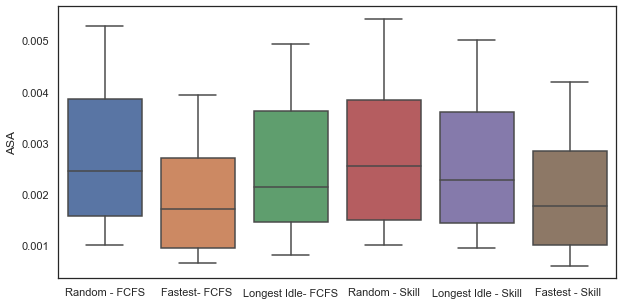

In [432]:
fig = plt.figure()
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Type", y="Waiting_Time_S", data=matrix_all_low,  showfliers = False)

ax.set_ylabel(ylabel='ASA',  fontsize=12)

ax.set_xlabel(xlabel='',  fontsize=20)

ax.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

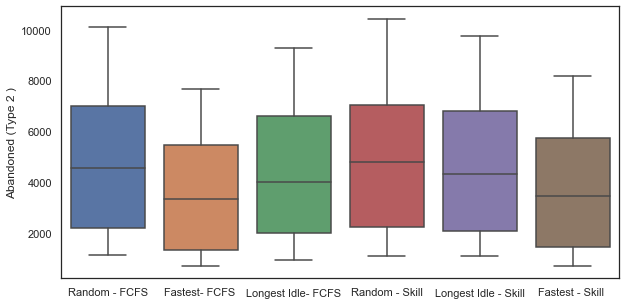

In [424]:
fig = plt.figure()
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Type", y="Abandonned_2", data=matrix_all_low,  showfliers = False)

ax.set_ylabel(ylabel='Abandoned (Type 2 )',  fontsize=12)

ax.set_xlabel(xlabel='',  fontsize=20)

ax.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

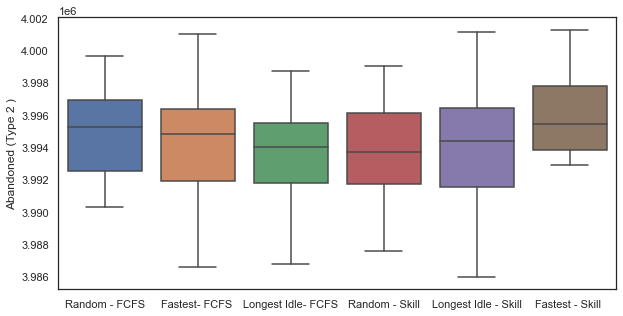

In [508]:
fig = plt.figure()
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Type", y="Served", data=matrix_all_low,  showfliers = False)

ax.set_ylabel(ylabel='Abandoned (Type 2 )',  fontsize=12)

ax.set_xlabel(xlabel='',  fontsize=20)

ax.grid(False)
plt.show()

In [ ]:
compare = [matrix_low, matrix_F_low, matrix_i_low,matrix_fr_low ,matrix_fI_low, matrix_ff_low]
l = matrix_routing_low["Routing"].unique()

<Figure size 432x288 with 0 Axes>

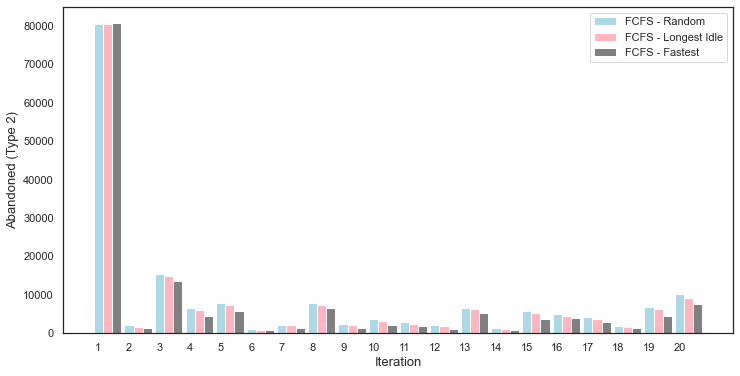

In [422]:
X = np.arange(1,21)
fig = plt.figure()
sns.set(style="white")
plt.figure(figsize=(12,6))

plt.bar(X+0, compare[0]["Abandonned_2"], color = 'lightblue', width = 0.3, label = "FCFS - Random" )

plt.bar(X+0.3, compare[2]["Abandonned_2"], color = 'lightpink', width = 0.3, label = "FCFS - Longest Idle" )

plt.bar(X+0.6, compare[1]["Abandonned_2"], color = 'grey', width = 0.3, label = "FCFS - Fastest" )

plt.ylabel("Abandoned (Type 2)", fontsize = 13)
plt.xlabel("Iteration", fontsize = 13)

plt.xticks(range(1,21))


plt.legend()

Routing Strategy when the system is less split up -> increase impact of fast server? and more split up ?

 The fastest strategy is more important because the split is longer 
 Check what occurs with a smaller split 

In [134]:
matrix_split = pd.DataFrame()
matrix_F_split = pd.DataFrame()
matrix_i_split = pd.DataFrame()
matrix_fr_split = pd.DataFrame()
matrix_fI_split = pd.DataFrame()
matrix_ff_split  =  pd.DataFrame()
free_servers = []

for i in range(0, 100):
    free_servers += ["Server_"+str(i)] 

for i in range(0,20):
    
    servicerate_1 = {}
    for server in free_servers:
        servicerate_1.update({ server : random.uniform(0,2)}) 
    servicerate_2 = {}
    for server in free_servers:
        servicerate_2.update({ server : random.uniform(0,2)})
        
    x = FCFSR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry(x, 40000)
    new_entry.update( AreaQ_2 = x[-1])
    new_entry.update( AreaQ_1 = x[-2])
    matrix_split = matrix_split.append(new_entry, ignore_index = True)
    
    y = FCFSF_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry(y, 40000)
    new_entry.update( AreaQ_2 = y[-1])
    new_entry.update( AreaQ_1 = y[-2])
    matrix_F_split = matrix_F_split.append(new_entry, ignore_index = True)
    
    z = FCFSI_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry(z, 40000)
    new_entry.update( AreaQ_2 = z[-1])
    new_entry.update( AreaQ_1 = z[-2])
    matrix_i_split = matrix_i_split.append(new_entry, ignore_index = True)
    
    w = FastR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry(w, 40000)
    new_entry.update( AreaQ_2 = w[-1])
    new_entry.update( AreaQ_1 = w[-2])
    matrix_fr_split = matrix_fr_split.append(new_entry, ignore_index = True)
    
    d = FastI_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry(d, 40000)
    new_entry.update( AreaQ_2 = d[-1])
    new_entry.update( AreaQ_1 = d[-2])
    matrix_fI_split = matrix_fI_split.append(new_entry, ignore_index = True)
    
    e = FastF_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry(e, 40000)
    new_entry.update( AreaQ_2 = e[-1])
    new_entry.update( AreaQ_1 = e[-2])
    matrix_ff_split = matrix_ff_split.append(new_entry, ignore_index = True)

In [455]:
compare = [matrix_split, matrix_F_split, matrix_i_split,matrix_fr_split ,matrix_fI_split, matrix_ff_split]
col_name = ["Measure", "Mean", "Variance"]
Level = ["FCFS", "FCFS", "FCFS","Skill", "Skill", "Skill"]
T = ["Random" ,"Fastest ", "Longest Idle", "Random","Longest Idle","Fastest "]
matrix_routing_split = pd.DataFrame (columns = col_name)

new_entry = { c : 0 for c in col_name}
b = 0
for c in compare:
    for key in ['Avg_People', 'Avg_Queue','Waited', 'Waiting_Time_S']:
        new_entry.update( Routing = Level[b] + "- " + T[b])
        new_entry.update( Measure = key)
        new_entry.update( Mean =  round(c[key].mean(), 5))
        new_entry.update( Variance =  statistics.variance((c)[key]))
        matrix_routing_split= matrix_routing_split.append(new_entry, ignore_index = True)
    b+=1

In [473]:
matrix_routing_split.sort_values(["Measure"])

,Measure,Mean,Variance,Routing
0,Avg_People,77.97313,1.396696e+01,FCFS- Random
16,Avg_People,73.88330,1.116325e+01,Skill- Longest Idle
12,Avg_People,77.91431,1.353053e+01,Skill- Random
4,Avg_People,67.01047,8.089823e+00,FCFS- Fastest
8,Avg_People,73.88203,1.138476e+01,FCFS- Longest Idle
20,Avg_People,67.03054,8.078532e+00,Skill- Fastest
13,Avg_Queue,0.07471,6.940447e-03,Skill- Random
17,Avg_Queue,0.03457,1.883412e-03,Skill- Longest Idle
9,Avg_Queue,0.03528,2.050060e-03,FCFS- Longest Idle
5,Avg_Queue,0.00843,1.479102e-04,FCFS- Fastest


In [461]:
matrix_list =  [matrix_fr_split ,matrix_fI_split, matrix_ff_split]
labels = [ "Random & Skill ",  "Idle & Skill ", "Fast & Skill  "]

<Figure size 432x288 with 0 Axes>

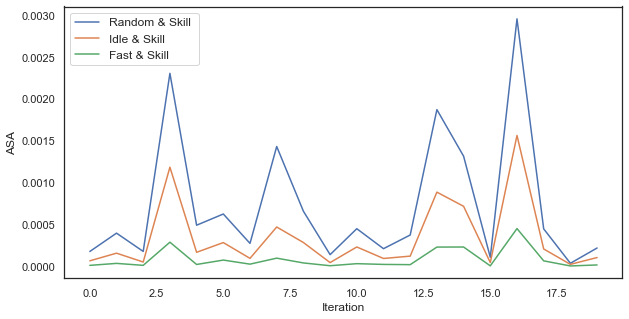

In [462]:
comparing_iteratively("Waiting_Time_S", matrix_list, 20, labels)

In [ ]:
ENFORCING A SYSTEM WHEREBY THE POOLING STRATEGY IS wider, leaving a larger shared pool making the effects of the Server selection more efficient ?

In [470]:
compare = [matrix_split, matrix_F_split, matrix_i_split,matrix_fr_split ,matrix_fI_split, matrix_ff_split]
T = ["Random - FCFS" ,"Fastest- FCFS ", "Longest Idle- FCFS", "Random - Skill","Longest Idle - Skill","Fastest - Skill "]

matrix_all_split = pd.DataFrame()
b=0 
for i in compare:
    i["Type"] = T[b]
    matrix_all_split = matrix_all_split.append(i, ignore_index = True)
    b+=1
    

matrix_all_split= matrix_all_split[['Waiting_Time_S','Served', 'Abandoned', 'Utilization','Type', 'Avg_People', 'Avg_Queue']]

